In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from textblob import TextBlob
# model
from sklearn.neighbors import KNeighborsClassifier



# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Sample Train data.....
sampleTrain = ['i will call you tonight', 'please help me...', 'Please call a cab please !']
# sample target vector......
y = [0,1,0]

### Count Vectoriser:

In [3]:
tonumeric = CountVectorizer()

In [4]:
# get unique words from the training data
tonumeric.fit(sampleTrain)
tonumeric.get_feature_names_out()

array(['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you'],
      dtype=object)

In [5]:
# convert the training data to document term matrix 
sampleTrain_dtm = tonumeric.transform(sampleTrain)
sampleTrain_dtm

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [6]:
# visualise the dtm......
sampleTrain_dtm.toarray()

array([[0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 2, 0, 0, 0]], dtype=int64)

In [7]:
pd.DataFrame(sampleTrain_dtm.toarray(),columns=tonumeric.get_feature_names_out())

,cab,call,help,me,please,tonight,will,you
0,0,1,0,0,0,1,1,1
1,0,0,1,1,1,0,0,0
2,1,1,0,0,2,0,0,0


In [9]:
# Build a model to predict target......
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(sampleTrain_dtm,y)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# test data for validation...
sample_Test = ["Don't call please"]

In [11]:
sample_Test_dtm = tonumeric.transform(sample_Test)
sample_Test_dtm

<1x8 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [12]:
sample_Test_dtm.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [13]:
pd.DataFrame(sample_Test_dtm.toarray(),columns=tonumeric.get_feature_names_out())

,cab,call,help,me,please,tonight,will,you
0,0,1,0,0,1,0,0,0


In [14]:
knn.predict(sample_Test_dtm)

array([0])

# TF-IDF Vectoriser:

In [15]:
tonumeric_tfidf = TfidfVectorizer()
tonumeric_tfidf.fit(sampleTrain)
tonumeric_tfidf.get_feature_names_out()

array(['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you'],
      dtype=object)

In [16]:
# Document Term Matrix for Train Data....
sample_train_tfidf_dtm = tonumeric_tfidf.transform(sampleTrain)
sample_train_tfidf_dtm

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [17]:
sample_train_tfidf_dtm.toarray()

array([[0.        , 0.40204024, 0.        , 0.        , 0.        ,
        0.52863461, 0.52863461, 0.52863461],
       [0.        , 0.        , 0.62276601, 0.62276601, 0.4736296 ,
        0.        , 0.        , 0.        ],
       [0.50689001, 0.38550292, 0.        , 0.        , 0.77100584,
        0.        , 0.        , 0.        ]])

In [18]:
pd.DataFrame(sample_train_tfidf_dtm.toarray(),columns=tonumeric_tfidf.get_feature_names_out())

,cab,call,help,me,please,tonight,will,you
0,0.00000,0.402040,0.000000,0.000000,0.000000,0.528635,0.528635,0.528635
1,0.00000,0.000000,0.622766,0.622766,0.473630,0.000000,0.000000,0.000000
2,0.50689,0.385503,0.000000,0.000000,0.771006,0.000000,0.000000,0.000000


In [19]:
# Document Term Matrix for Test Data...
sample_Test_tfidf_dtm = tonumeric_tfidf.transform(sample_Test)
sample_Test_tfidf_dtm

<1x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [20]:
sample_Test_tfidf_dtm.toarray()

array([[0.        , 0.70710678, 0.        , 0.        , 0.70710678,
        0.        , 0.        , 0.        ]])

In [21]:
pd.DataFrame(sample_Test_tfidf_dtm.toarray(),columns=tonumeric_tfidf.get_feature_names_out())

,cab,call,help,me,please,tonight,will,you
0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.0,0.0


In [22]:
# Model Building on TF-IDF Vectorisation.....
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(sample_train_tfidf_dtm,y)
knn.predict(sample_Test_tfidf_dtm)

array([0])

## Fine Tune the vectorizer...

In [23]:
# Sample text data
corpus = ["This is a sample sentence.",
          "Another example of a sentence.",
          "Yet another example for demonstration purposes."]

# Create a CountVectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Get the feature names (words or n-grams)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visibility
X_array = X.toarray()

# Print the feature names and the transformed matrix
print("Feature Names:", feature_names)
print("Transformed Matrix:")
print(X_array)


Feature Names: ['another' 'another example' 'demonstration' 'demonstration purposes'
 'example' 'example for' 'example of' 'for' 'for demonstration' 'is'
 'is sample' 'of' 'of sentence' 'purposes' 'sample' 'sample sentence'
 'sentence' 'this' 'this is' 'yet' 'yet another']
Transformed Matrix:
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0]
 [1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
 [1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1]]


In [24]:
# Sample text data
corpus = ["This is a sample sentence.",
          "Another example of a sentence.",
          "Yet another example for demonstration purposes."]

# Create a CountVectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Get the feature names (words or n-grams)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visibility
X_array = X.toarray()

# Print the feature names and the transformed matrix
print("Feature Names:", feature_names)
print("Transformed Matrix:")
print(X_array)


Feature Names: ['demonstration' 'example' 'purposes' 'sample' 'sentence']
Transformed Matrix:
[[0 0 0 1 1]
 [0 1 0 0 1]
 [1 1 1 0 0]]


In [25]:
# Sample text data
corpus = ["This is a sample sentence.",
          "Another example of a sentence.",
          "Yet another example for demonstration purposes."]

# Create a CountVectorizer with max_df=0.5
vectorizer = CountVectorizer(max_df=0.5)

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Get the feature names (words or n-grams)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visibility
X_array = X.toarray()

# Print the feature names and the transformed matrix
print("Feature Names:", feature_names)
print("Transformed Matrix:")
print(X_array)


Feature Names: ['demonstration' 'for' 'is' 'of' 'purposes' 'sample' 'this' 'yet']
Transformed Matrix:
[[0 0 1 0 0 1 1 0]
 [0 0 0 1 0 0 0 0]
 [1 1 0 0 1 0 0 1]]


In [26]:
# Sample text data
corpus = ["This is a sample sentence.",
          "Another example of a sentence.",
          "Yet another example for demonstration purposes."]

# Create a CountVectorizer with min_df=2
vectorizer = CountVectorizer(min_df=2)

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Get the feature names (words or n-grams)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visibility
X_array = X.toarray()

# Print the feature names and the transformed matrix
print("Feature Names:", feature_names)
print("Transformed Matrix:")
print(X_array)


Feature Names: ['another' 'example' 'sentence']
Transformed Matrix:
[[0 0 1]
 [1 1 1]
 [1 1 0]]


In [ ]:
## Viualsize the word cloud...

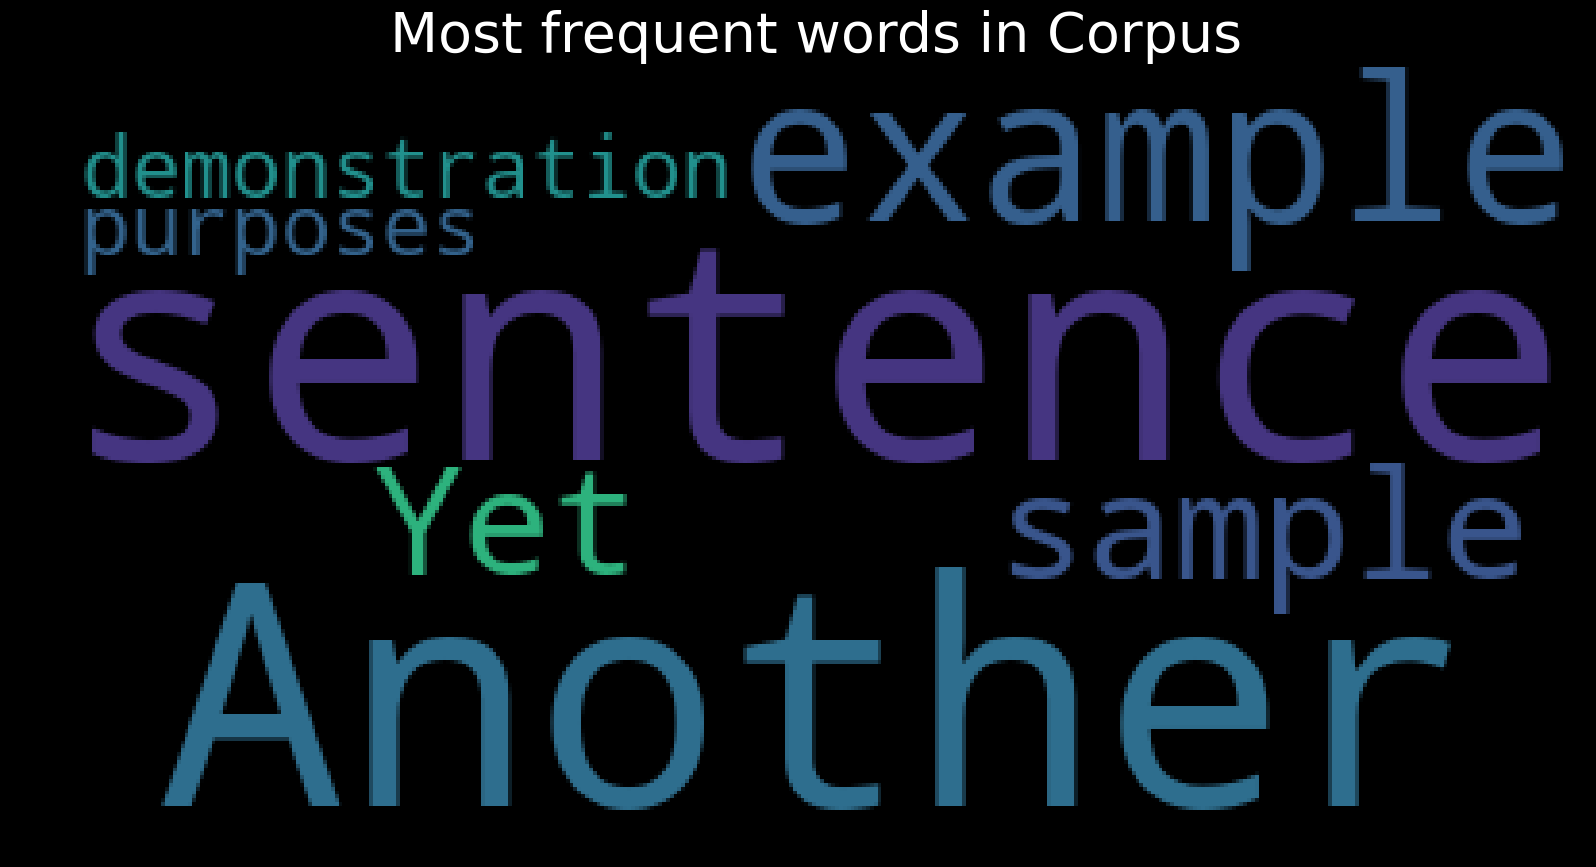

In [30]:
wc = WordCloud()
wc.generate(str(corpus))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in Corpus", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

In [31]:
## Lemmatization and Stemming:

In [32]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [33]:
# create an object of class PorterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

* **Porter Stemmer:**
* It uses set of rules to decide whether it is wise to strip a suffix.
* Quite often does not generate words which are in dictionary.
* PorterStemmer is known for its simplicity and speed.


In [34]:
#proide a word to be stemmed
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))

cat
troubl
troubl
troubl


## Sentence Stemming:

In [35]:
sentence="Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success."
porter.stem(sentence)

'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

In [36]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [38]:
def stemsentence(sentence):
    token_words= word_tokenize(sentence)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(' ')
    return ' '.join(stem_sentence)

x= stemsentence(sentence)
print(x)

python   are   veri   intellig   and   work   veri   pythonli   and   now   they   are   python   their   way   to   success   .  


In [39]:
from textblob import TextBlob

In [40]:
sent = TextBlob(sentence)

In [42]:
' '.join([porter.stem(word) for word in sent.words])

'python are veri intellig and work veri pythonli and now they are python their way to success'

## Sentiment Analysis:

In [43]:
text = "I hate anything that goes in my ear"

In [44]:
result = TextBlob(text)

In [45]:
result.sentiment.polarity

-0.8

In [46]:
text = "I love anything that goes in my ear"
result = TextBlob(text)
result.sentiment.polarity

0.5

In [47]:
text = "I like anything that goes in my ear"
result = TextBlob(text)
result.sentiment.polarity

0.0